## 1. Import libraries and load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('VN30_stock_price_19-21.csv')
df.head()

,Attributes,high,high.1,high.2,high.3,high.4,high.5,high.6,high.7,high.8,...,volume.20,volume.21,volume.22,volume.23,volume.24,volume.25,volume.26,volume.27,volume.28,volume.29
0,Symbols,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,29.6,34.4,90.9,19.45,42.15,86.9,9.5,30.3,31.45,...,1429030,101860.0,1246640,334420,105940.0,602450,509920,403570,1037420,3436930
3,2019-01-03,29.1,33.8,91.0,19.2,41.45,87.0,9.5,29.0,30.9,...,1867580,87800.0,1071350,546210,94022.0,496950,579590,949730,3618830,2803222
4,2019-01-04,28.5,31.95,89.2,18.55,41.45,85.5,9.5,29.0,30.0,...,3047830,163350.0,1501650,514640,90100.0,478000,882080,498470,1998210,982790


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Columns: 181 entries, Attributes to volume.29
dtypes: object(181)
memory usage: 1.0+ MB


In [4]:
df.describe()

,Attributes,high,high.1,high.2,high.3,high.4,high.5,high.6,high.7,high.8,...,volume.20,volume.21,volume.22,volume.23,volume.24,volume.25,volume.26,volume.27,volume.28,volume.29
count,754,748,753,753,753,752,753,746,752,752,...,753,752,753,753,743,753,753,753,753,753
unique,754,229,293,378,350,343,367,319,246,396,...,753,751,752,753,742,752,741,750,753,753
top,Symbols,29.1,40.0,57.5,21.3,57.0,103.0,14.0,27.0,23.3,...,TCB,73710.0,1191800,VHM,1449500.0,2226600,467800,2897900,VPB,VRE
freq,1,12,13,9,10,8,15,17,16,8,...,1,2,2,1,2,2,2,2,1,1


## 2. Clean the dataset

In [5]:
# Remove the unecessary columns
df.drop(df.iloc[:,1:91], axis = 1, inplace = True)

In [6]:
df.drop(df.iloc[:,31:], axis = 1, inplace = True)
df

,Attributes,close,close.1,close.2,close.3,close.4,close.5,close.6,close.7,close.8,...,close.20,close.21,close.22,close.23,close.24,close.25,close.26,close.27,close.28,close.29
0,Symbols,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,29.2,33.5,89.0,19.0,41.2,86.8,9.5,28.2,30.8,...,25.6,19.95,53.6,73.5,17.8,100.4,117.0,124.0,19.4,28.8
3,2019-01-03,28.1,32.0,89.2,18.1,40.8,84.7,9.4,28.15,29.5,...,25.0,19.5,53.6,73.2,17.5,100.3,116.2,122.9,19.0,27.7
4,2019-01-04,28.3,31.55,88.6,18.35,41.1,84.5,9.4,29.0,29.7,...,24.95,19.45,54.4,74.0,17.6,100.6,115.0,125.0,18.95,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2021-12-27,33.15,35.3,56.1,33.4,94.5,95.9,38.6,28.75,45.9,...,48.85,40.75,79.8,82.8,43.2,99.0,125.0,86.1,34.35,31.3
750,2021-12-28,33.65,35.2,55.7,33.9,94.5,98.1,37.85,30.5,45.8,...,49.15,42.05,80.0,82.8,42.9,98.4,125.2,85.5,34.55,30.8
751,2021-12-29,33.8,35.2,55.2,34.15,93.6,97.0,36.9,30.6,45.8,...,49.1,41.35,79.5,81.7,44.1,95.5,125.2,85.2,34.75,30.55
752,2021-12-30,33.9,35.4,55.1,33.8,93.6,97.0,37.0,30.6,45.7,...,49.3,40.75,78.4,81.6,44.25,95.0,126.0,85.3,35.4,30.5


Now we are having the table for the closing price of VN30 companies. Then we adjust the column's name of the table.

In [7]:
df.columns = ["Date", "ACB", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG", "KDH", "MBB", "MSN", "MWG", "NVL", "PDR", "PLX", "POW", "SAB", "SSI", "STB", "TCB", "TPB", "VCB", "VHM", "VIB", "VIC", "VJC", "VNM", "VPB", "VRE"]

In [8]:
# Drop the unnessary rows:
df.drop([0,1], axis=0, inplace=True)

In [9]:
# Reset the index
df = df.reset_index(drop=True)
df

,Date,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
0,2019-01-02,29.2,33.5,89.0,19.0,41.2,86.8,9.5,28.2,30.8,...,25.6,19.95,53.6,73.5,17.8,100.4,117.0,124.0,19.4,28.8
1,2019-01-03,28.1,32.0,89.2,18.1,40.8,84.7,9.4,28.15,29.5,...,25.0,19.5,53.6,73.2,17.5,100.3,116.2,122.9,19.0,27.7
2,2019-01-04,28.3,31.55,88.6,18.35,41.1,84.5,9.4,29.0,29.7,...,24.95,19.45,54.4,74.0,17.6,100.6,115.0,125.0,18.95,27.5
3,2019-01-07,28.7,32.3,88.6,18.15,41.8,86.3,9.0,28.9,29.35,...,25.1,19.65,54.6,74.2,17.7,101.0,116.0,131.0,19.25,27.9
4,2019-01-08,28.5,32.0,88.2,17.9,42.0,88.3,9.2,28.5,28.85,...,25.1,19.7,55.0,74.2,17.8,101.0,115.0,130.0,19.15,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2021-12-27,33.15,35.3,56.1,33.4,94.5,95.9,38.6,28.75,45.9,...,48.85,40.75,79.8,82.8,43.2,99.0,125.0,86.1,34.35,31.3
748,2021-12-28,33.65,35.2,55.7,33.9,94.5,98.1,37.85,30.5,45.8,...,49.15,42.05,80.0,82.8,42.9,98.4,125.2,85.5,34.55,30.8
749,2021-12-29,33.8,35.2,55.2,34.15,93.6,97.0,36.9,30.6,45.8,...,49.1,41.35,79.5,81.7,44.1,95.5,125.2,85.2,34.75,30.55
750,2021-12-30,33.9,35.4,55.1,33.8,93.6,97.0,37.0,30.6,45.7,...,49.3,40.75,78.4,81.6,44.25,95.0,126.0,85.3,35.4,30.5


## 3. EDA

In [10]:
# Check number of Null Values
df.isnull().sum()

Date     0
ACB      5
BID      0
BVH      0
CTG      0
FPT      1
GAS      0
GVR      7
HDB      1
HPG      1
KDH      0
MBB      0
MSN      0
MWG      0
NVL      2
PDR      0
PLX      0
POW      8
SAB      0
SSI      0
STB      0
TCB      0
TPB      1
VCB      0
VHM      0
VIB     10
VIC      0
VJC      0
VNM      0
VPB      0
VRE      0
dtype: int64

In [11]:
# Delete the rows with any missing values
newdf = df.dropna(axis=0, how='any')

In [12]:
newdf.isnull().sum()

Date    0
ACB     0
BID     0
BVH     0
CTG     0
FPT     0
GAS     0
GVR     0
HDB     0
HPG     0
KDH     0
MBB     0
MSN     0
MWG     0
NVL     0
PDR     0
PLX     0
POW     0
SAB     0
SSI     0
STB     0
TCB     0
TPB     0
VCB     0
VHM     0
VIB     0
VIC     0
VJC     0
VNM     0
VPB     0
VRE     0
dtype: int64

The dataset now is not including any missing value. We will work with this new dataset

In [13]:
newdf = newdf.reset_index(drop=True)

In [14]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    722 non-null    object
 1   ACB     722 non-null    object
 2   BID     722 non-null    object
 3   BVH     722 non-null    object
 4   CTG     722 non-null    object
 5   FPT     722 non-null    object
 6   GAS     722 non-null    object
 7   GVR     722 non-null    object
 8   HDB     722 non-null    object
 9   HPG     722 non-null    object
 10  KDH     722 non-null    object
 11  MBB     722 non-null    object
 12  MSN     722 non-null    object
 13  MWG     722 non-null    object
 14  NVL     722 non-null    object
 15  PDR     722 non-null    object
 16  PLX     722 non-null    object
 17  POW     722 non-null    object
 18  SAB     722 non-null    object
 19  SSI     722 non-null    object
 20  STB     722 non-null    object
 21  TCB     722 non-null    object
 22  TPB     722 non-null    ob

Because the datatype of all columns is object, we need to convert the datatype of all comlumns as below:
- 'Date' column: object -> Datetime
- Stock price columns of VN30 companies: object -> float 

In [15]:
# Change the type of columns in the dataset
newdf["Date"] = pd.to_datetime(newdf["Date"])

In [16]:
for col in ["ACB", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG", "KDH", "MBB", "MSN", "MWG", "NVL", "PDR", "PLX", "POW", "SAB", "SSI", "STB", "TCB", "TPB", "VCB", "VHM", "VIB", "VIC", "VJC", "VNM", "VPB", "VRE"]:
    newdf[col] = newdf[col].astype('float')

In [17]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    722 non-null    datetime64[ns]
 1   ACB     722 non-null    float64       
 2   BID     722 non-null    float64       
 3   BVH     722 non-null    float64       
 4   CTG     722 non-null    float64       
 5   FPT     722 non-null    float64       
 6   GAS     722 non-null    float64       
 7   GVR     722 non-null    float64       
 8   HDB     722 non-null    float64       
 9   HPG     722 non-null    float64       
 10  KDH     722 non-null    float64       
 11  MBB     722 non-null    float64       
 12  MSN     722 non-null    float64       
 13  MWG     722 non-null    float64       
 14  NVL     722 non-null    float64       
 15  PDR     722 non-null    float64       
 16  PLX     722 non-null    float64       
 17  POW     722 non-null    float64       
 18  SAB     72

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaled_features = newdf.copy()

col_names = ["ACB", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG", "KDH", "MBB", "MSN", "MWG", "NVL", "PDR", "PLX", "POW", "SAB", "SSI", "STB", "TCB", "TPB", "VCB", "VHM", "VIB", "VIC", "VJC", "VNM", "VPB", "VRE"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

In [19]:
scaled_features

,Date,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
0,2019-01-14,0.138673,-1.716738,1.710942,-1.076061,-1.103947,-0.071470,-1.008538,0.483183,-0.416136,...,-0.409496,-0.600835,-2.290146,-0.874187,-0.770166,-0.467928,-0.427549,1.458075,-0.790126,-0.155681
1,2019-01-15,0.217439,-1.593829,1.724690,-1.064437,-1.087855,-0.014389,-1.008538,0.513165,-0.416136,...,-0.357449,-0.724011,-2.244909,-0.651959,-0.777678,-0.459818,-0.452133,1.452054,-0.777662,0.017183
2,2019-01-16,0.158365,-1.655283,1.814054,-1.087686,-1.101265,0.007017,-0.989087,0.513165,-0.404270,...,-0.357449,-0.762909,-2.282606,-0.617770,-0.777678,-0.419270,-0.550468,1.337643,-0.740270,0.136858
3,2019-01-17,0.178056,-1.706496,1.944662,-1.116748,-1.130768,-0.107145,-0.998813,0.423219,-0.447779,...,-0.345438,-0.775875,-2.297685,-0.660506,-0.732603,-0.419270,-0.591441,1.289470,-0.793242,-0.222167
4,2019-01-18,0.118981,-1.757708,1.944662,-1.145810,-1.130768,-0.107145,-0.979362,0.483183,-0.424047,...,-0.337431,-0.762909,-2.327843,-0.600675,-0.755141,-0.403051,-0.616024,1.397859,-0.777662,-0.448220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2021-12-27,1.014949,-1.020249,-0.516273,0.621164,1.685398,0.385177,1.831239,0.378245,0.897048,...,1.432174,1.823803,-0.442988,-0.404089,1.145533,-0.662557,0.187045,-1.486499,0.163370,0.096967
718,2021-12-28,1.113407,-1.040734,-0.543770,0.679288,1.685398,0.542149,1.758299,0.902934,0.889137,...,1.456195,1.992360,-0.427909,-0.404089,1.122995,-0.711214,0.203435,-1.522628,0.175834,-0.036006
719,2021-12-29,1.142944,-1.040734,-0.578140,0.708350,1.637120,0.463663,1.665909,0.932916,0.889137,...,1.452192,1.901599,-0.465606,-0.498108,1.213146,-0.946391,0.203435,-1.540693,0.188298,-0.102492
720,2021-12-30,1.162636,-0.999764,-0.585014,0.667663,1.637120,0.463663,1.675634,0.932916,0.881226,...,1.468206,1.823803,-0.548540,-0.506656,1.224414,-0.986939,0.268991,-1.534672,0.228806,-0.115789


## 4. Apply the hierarchical clustering algorithms

In [20]:
scaled_features_without_date = scaled_features.copy()
scaled_features_without_date.drop(columns = ['Date'], inplace=True)

In [21]:
scaled_features_without_date

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIB,VIC,VJC,VNM,VPB,VRE
0,0.138673,-1.716738,1.710942,-1.076061,-1.103947,-0.071470,-1.008538,0.483183,-0.416136,-0.010369,...,-0.409496,-0.600835,-2.290146,-0.874187,-0.770166,-0.467928,-0.427549,1.458075,-0.790126,-0.155681
1,0.217439,-1.593829,1.724690,-1.064437,-1.087855,-0.014389,-1.008538,0.513165,-0.416136,-0.023309,...,-0.357449,-0.724011,-2.244909,-0.651959,-0.777678,-0.459818,-0.452133,1.452054,-0.777662,0.017183
2,0.158365,-1.655283,1.814054,-1.087686,-1.101265,0.007017,-0.989087,0.513165,-0.404270,-0.023309,...,-0.357449,-0.762909,-2.282606,-0.617770,-0.777678,-0.419270,-0.550468,1.337643,-0.740270,0.136858
3,0.178056,-1.706496,1.944662,-1.116748,-1.130768,-0.107145,-0.998813,0.423219,-0.447779,-0.029779,...,-0.345438,-0.775875,-2.297685,-0.660506,-0.732603,-0.419270,-0.591441,1.289470,-0.793242,-0.222167
4,0.118981,-1.757708,1.944662,-1.145810,-1.130768,-0.107145,-0.979362,0.483183,-0.424047,-0.049190,...,-0.337431,-0.762909,-2.327843,-0.600675,-0.755141,-0.403051,-0.616024,1.397859,-0.777662,-0.448220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1.014949,-1.020249,-0.516273,0.621164,1.685398,0.385177,1.831239,0.378245,0.897048,2.946550,...,1.432174,1.823803,-0.442988,-0.404089,1.145533,-0.662557,0.187045,-1.486499,0.163370,0.096967
718,1.113407,-1.040734,-0.543770,0.679288,1.685398,0.542149,1.758299,0.902934,0.889137,2.881847,...,1.456195,1.992360,-0.427909,-0.404089,1.122995,-0.711214,0.203435,-1.522628,0.175834,-0.036006
719,1.142944,-1.040734,-0.578140,0.708350,1.637120,0.463663,1.665909,0.932916,0.889137,2.946550,...,1.452192,1.901599,-0.465606,-0.498108,1.213146,-0.946391,0.203435,-1.540693,0.188298,-0.102492
720,1.162636,-0.999764,-0.585014,0.667663,1.637120,0.463663,1.675634,0.932916,0.881226,2.830085,...,1.468206,1.823803,-0.548540,-0.506656,1.224414,-0.986939,0.268991,-1.534672,0.228806,-0.115789


In [22]:
scaled_features_without_date = scaled_features_without_date.transpose() # Transpose the dataset for applying the dendogram

In [23]:
scaled_features_without_date.head()

,0,1,2,3,4,5,6,7,8,9,...,712,713,714,715,716,717,718,719,720,721
ACB,0.138673,0.217439,0.158365,0.178056,0.118981,0.296206,0.217439,0.217439,0.237131,0.237131,...,1.005103,0.946028,0.926337,0.886954,0.985412,1.014949,1.113407,1.142944,1.162636,1.280786
BID,-1.716738,-1.593829,-1.655283,-1.706496,-1.757708,-1.522131,-1.542616,-1.552859,-1.593829,-1.686011,...,0.884855,0.720975,0.618550,-1.184129,-1.081704,-1.020249,-1.040734,-1.040734,-0.999764,-0.651519
BVH,1.710942,1.724690,1.814054,1.944662,1.944662,1.951536,1.814054,1.834676,1.834676,1.944662,...,-0.481903,-0.454406,-0.488777,-0.598763,-0.523147,-0.516273,-0.543770,-0.578140,-0.585014,-0.523147
CTG,-1.076061,-1.064437,-1.087686,-1.116748,-1.145810,-1.000500,-0.988875,-0.942376,-0.884252,-0.913314,...,0.510728,0.458416,0.417729,0.481666,0.563039,0.621164,0.679288,0.708350,0.667663,0.679288
FPT,-1.103947,-1.087855,-1.101265,-1.130768,-1.130768,-1.103947,-1.111993,-1.111993,-1.106629,-1.109311,...,1.755131,1.722946,1.712218,1.615664,1.647849,1.685398,1.685398,1.637120,1.637120,1.604936


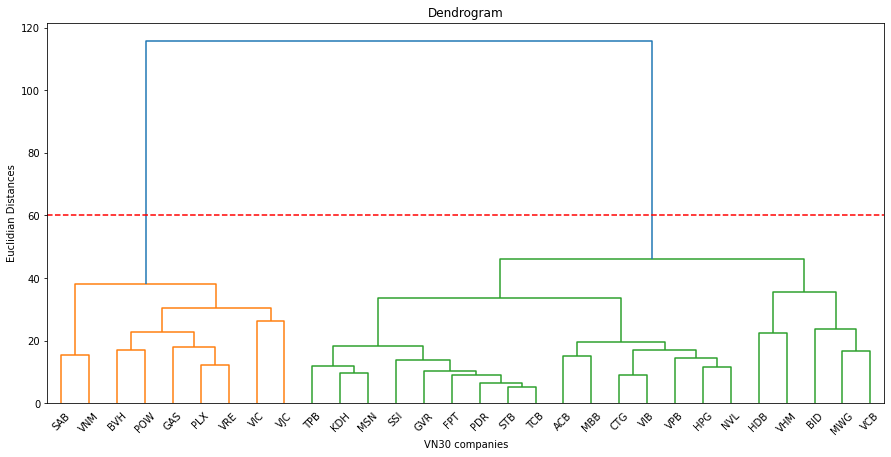

In [24]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_without_date, method = 'ward'), labels=col_names) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') 
plt.xlabel('VN30 companies') # label of the x-axis
plt.ylabel('Euclidian Distances') # label of the y-axis
plt.axhline(y=60, color='r', linestyle='--') # Threshold line
plt.show() # show the dendrogram

In [25]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_model.fit(scaled_features_without_date)
clustering_model.labels_

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [26]:
data = {'VN30 Companies': ["ACB", "BID", "BVH", "CTG", "FPT", "GAS", "GVR", "HDB", "HPG", "KDH", "MBB", "MSN", "MWG", "NVL", "PDR", "PLX", "POW", "SAB", "SSI", "STB", "TCB", "TPB", "VCB", "VHM", "VIB", "VIC", "VJC", "VNM", "VPB", "VRE"],
        'Labels': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]}

df_clustered = pd.DataFrame(data)

print (df_clustered)

   VN30 Companies  Labels
0             ACB       0
1             BID       0
2             BVH       1
3             CTG       0
4             FPT       0
5             GAS       1
6             GVR       0
7             HDB       0
8             HPG       0
9             KDH       0
10            MBB       0
11            MSN       0
12            MWG       0
13            NVL       0
14            PDR       0
15            PLX       1
16            POW       1
17            SAB       1
18            SSI       0
19            STB       0
20            TCB       0
21            TPB       0
22            VCB       0
23            VHM       0
24            VIB       0
25            VIC       1
26            VJC       1
27            VNM       1
28            VPB       0
29            VRE       1


In [27]:
df_clustered.sort_values(by=['Labels'])

,VN30 Companies,Labels
0,ACB,0
24,VIB,0
23,VHM,0
22,VCB,0
21,TPB,0
20,TCB,0
19,STB,0
18,SSI,0
28,VPB,0
13,NVL,0


Based on the results from the hierarchical clustering algorithm, there are 2 clusters:
- Cluster 1: The group of service providing and manufacturing companies 
- Cluster 2: The group of financial-related companies (bank, real estate companies, multi-industry companies)

## 5. Data visualization for two clusters

### 5.1 Service providing and manufacturing companies

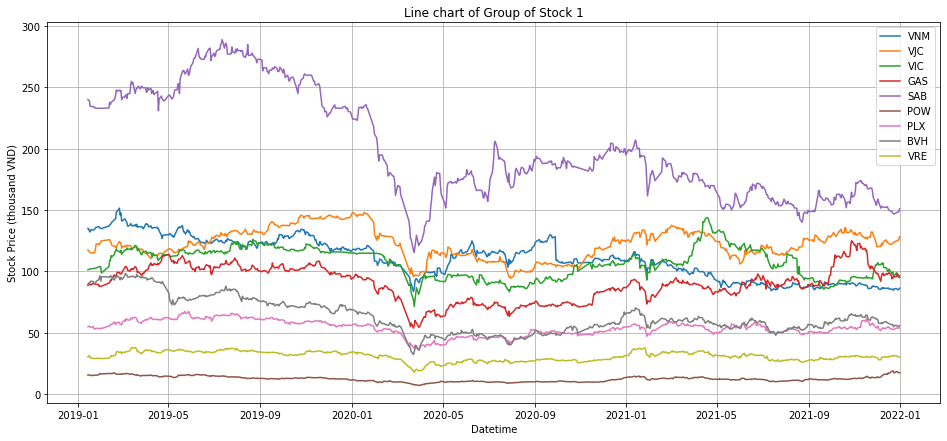

In [28]:
Date = newdf['Date']
newdf2 = newdf[['VNM', 'VJC', 'VIC', 'GAS', 'SAB', 'POW', 'PLX', 'BVH', 'VRE']]

plt.figure(figsize=(16,7)) 
for col in newdf2.columns:
    plt.plot(Date, newdf2[col], label=col)
plt.title('Line chart of Group of Stock 1')
plt.xlabel('Datetime')
plt.ylabel('Stock Price (thousand VND)')
plt.legend()
plt.grid()
plt.show()

- From 2019 to 2021, the highest stock price of this cluster (and all VN30 companies also) is SAB (Saigon Beer - Alcohol - Beverage Corporation).
- We can clearly see that there is a downtrend of the stock price for this cluster from March to April 2020. The reason for this dowwntrend will be presented in the next part 5.2.

### 5.2 Financial-related companies

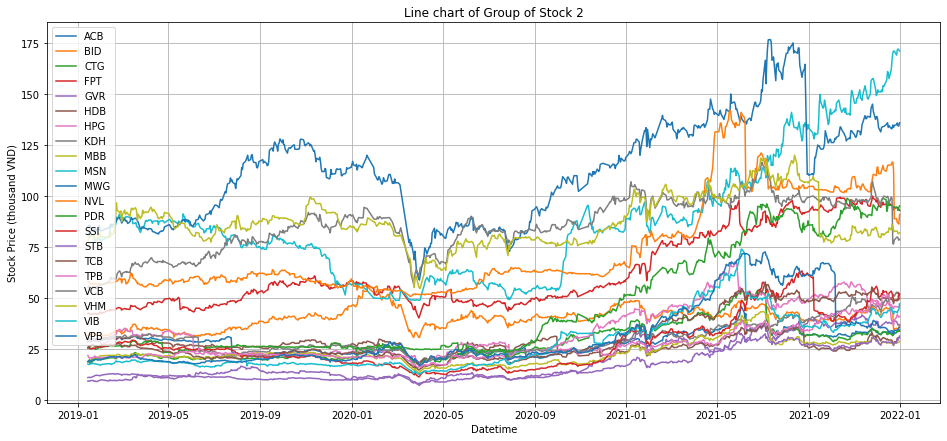

In [29]:
Date = newdf['Date']
newdf1 = newdf.drop(['Date', 'VNM', 'VJC', 'VIC', 'GAS', 'SAB', 'POW', 'PLX', 'BVH', 'VRE'], axis = 1)

plt.figure(figsize=(16,7)) 
for col in newdf1.columns:
    plt.plot(Date, newdf1[col], label=col)
plt.title('Line chart of Group of Stock 2')
plt.xlabel('Datetime')
plt.ylabel('Stock Price (thousand VND)')
plt.legend()
plt.grid()
plt.show()

- In general, this cluster of stock price also has a downtrend in Mar-Apr 2020 (same as the first cluster). In March 2020, this is the time when the COVID-19 epidemic broke out, seriously affecting people's lives. In April 2020, social distancing caused a big stagnation in production and people's lives, thereby significantly affecting the stock market.
- However, unlike the first cluster, there is an increase in price of stock for this cluster from 2021-2022. Based on my the research and study, in this time, Vietnam was affected by COVID-19 pandemic and people was likely to spend their money more on stock market. Accordingly, in 2021, the VN-Index and the main stock indices on HoSE continuously conquered new peaks, the VN-Index reached 1500.81 points on 25 November 2021. This is the highest number in 21 years of operation Vietnam stock market.
- At the end of 2021, MSN (Masan Group Corporation) has become the highest stock price in this cluter.